[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]
[ 1  1 -1 -1  1 -1  1 -1 -1 -1]


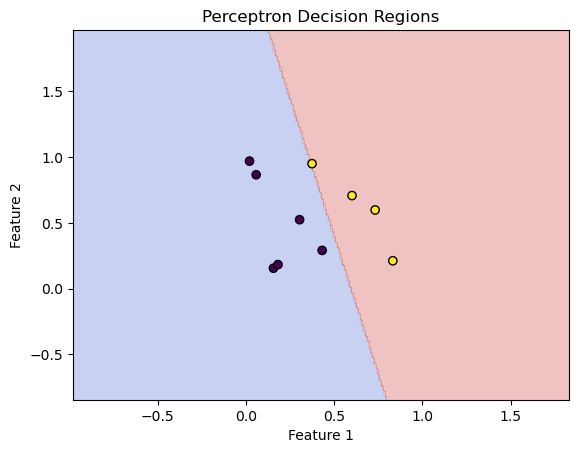

In [1]:
'''With a suitable example demonstrate the perceptron learning law with its decision regions using
python. Give the output in graphical form.'''


import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Update weights and bias using the perceptron learning rule
                prediction = np.dot(X[i], self.weights) + self.bias
                if prediction >= 0:
                    y_pred = 1
                else:
                    y_pred = -1

                if y[i] != y_pred:
                    update = self.learning_rate * (y[i] - y_pred)
                    self.weights += update * X[i]
                    self.bias += update

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

def plot_decision_regions(X, y, classifier):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3,cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c= y, marker='o', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Regions')
    plt.show()

# Example data
np.random.seed(42)

'''
*if asked for take input from user :

# User input for number of data points
num_points = int(input("Enter the number of data points: "))

# Generating random data
X = np.random.rand(num_points, 2)

'''
X = np.random.rand(10, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)
print(X)
print(y)
# Train perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=50)
perceptron.train(X, y)

# Plot decision regions
plot_decision_regions(X, y, perceptron)
